In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def f(x):
    return np.sin(10 + 2.3 ** x)

\begin{equation}
f(x) = \sin{(10 + 2.3^x)}
\end{equation}

In [43]:
a, b = 1, 2.5

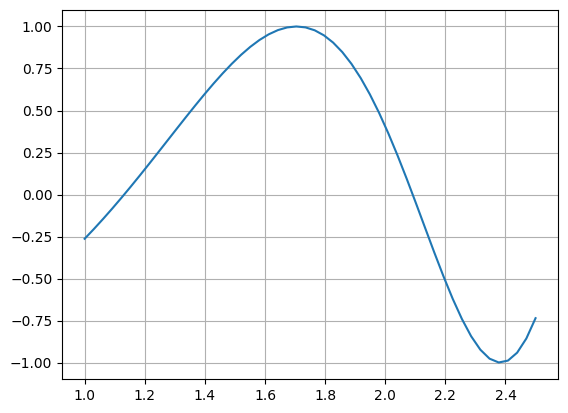

In [44]:
x_vals = np.linspace(a, b)
plt.plot(x_vals, f(x_vals))
plt.grid(True)

In [45]:
a0, b0 = 1.2, 2.2

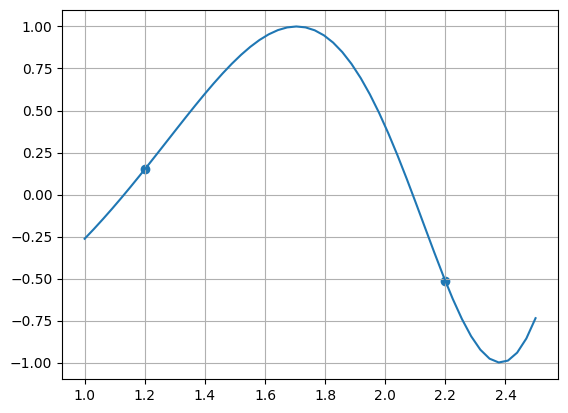

In [46]:
plt.plot(x_vals, f(x_vals))
plt.scatter(np.array([a0, b0]), f(np.array([a0, b0])))
plt.grid(True)

# Метод дихотомии

\begin{equation}
x_l = f(\frac{a + b}{2} - \frac{\varepsilon}{2})
\end{equation}

\begin{equation}
x_r = f(\frac{a + b}{2} + \frac{\varepsilon}{2})
\end{equation}

# Вариант 1

\begin{equation}
|x_{k+1} - x_{k}| < \varepsilon
\end{equation}

In [47]:
eps = 0.001 * (b0 - a0)

In [58]:
k = 0
a, b = a0, b0
x_apprs = [np.inf, (a0 + b0) / 2]
eps1 = []
while abs(x_apprs[-1] - x_apprs[-2]) > eps:
    if f((a + b) / 2 - eps / 2) >= f((a + b) / 2 + eps / 2):
        b = (a + b) / 2 + eps / 2
    else:
        a = (a + b) / 2 - eps / 2
    x_apprs.append((a + b) / 2)
    eps1.append(abs(x_apprs[-1] - x_apprs[-2]))
    k += 1
k

9

In [49]:
x_apprs[-1]

1.7048779296875003

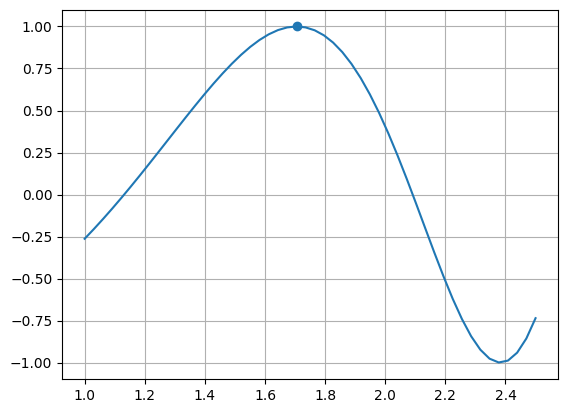

In [52]:
plt.plot(x_vals, f(x_vals))
plt.scatter(x_apprs[-1], f(x_apprs[-1]))
plt.grid(True)

# Вариант 2

\begin{equation}
|a - b| < \varepsilon
\end{equation}

In [59]:
k = 0
a, b = a0, b0
eps2 = []
while abs(b - a) > 2 * eps:
    if f((a + b) / 2 - eps / 2) >= f((a + b) / 2 + eps / 2):
        b = (a + b) / 2 + eps / 2
    else:
        a = (a + b) / 2 - eps / 2
    eps2.append(abs(b - a))
    k += 1
k

10

In [56]:
x_appr = (a + b) / 2
x_appr

1.7053657226562504

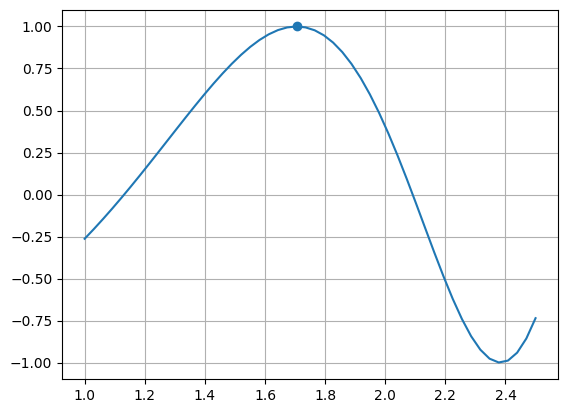

In [57]:
plt.plot(x_vals, f(x_vals))
plt.scatter(x_appr, f(x_appr))
plt.grid(True)

# Метод Ньютона

\begin{equation}
x_k = x_{k-1} - \frac{f'(x_k)}{f''(x_k)}
\end{equation}

# Вариант 1

\begin{equation}
|x_{k+1} - x_{k}| < \varepsilon
\end{equation}

In [61]:
h = 0.001

In [132]:
k = 0
eps3 = []
x_apprs = [1.3, 1.44]
while abs(x_apprs[-1] - x_apprs[-2]) > eps:
    x_apprs.append(x_apprs[-1] - (h / 2) * (f(x_apprs[-1] + h) - f(x_apprs[-1] - h)) 
                   / (f(x_apprs[-1] + h) - 2 * f(x_apprs[-1]) + f(x_apprs[-1] - h)))
    eps3.append(abs(x_apprs[-1] - x_apprs[-2]))
    k += 1
k

5

In [133]:
x_apprs[-1]

1.7048809987116131

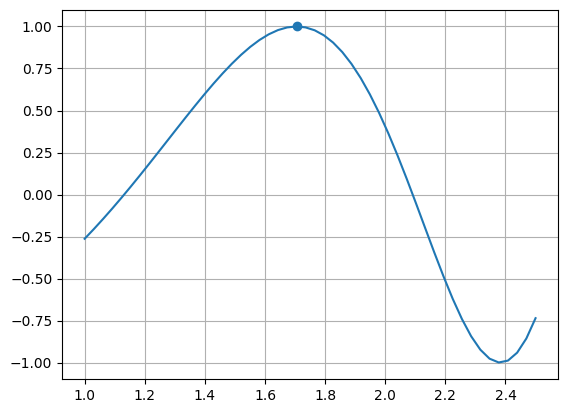

In [139]:
plt.plot(x_vals, f(x_vals))
plt.scatter(x_apprs[-1], f(x_apprs[-1]))
plt.grid(True)

# Вариант 2

\begin{equation}
|f'(x_{k})| < \varepsilon
\end{equation}

In [137]:
k = 0
eps4 = []
x_apprs = [1.45]
while abs((f(x_apprs[-1] + h) - f(x_apprs[-1] - h)) / (2 * h)) > eps:
    x_apprs.append(x_apprs[-1] - (h / 2) * (f(x_apprs[-1] + h) - f(x_apprs[-1] - h)) 
                   / (f(x_apprs[-1] + h) - 2 * f(x_apprs[-1]) + f(x_apprs[-1] - h)))
    eps4.append(abs(x_apprs[-1] - x_apprs[-2]))
    k += 1
k

4

In [134]:
x_apprs[-1]

1.7048809987116131

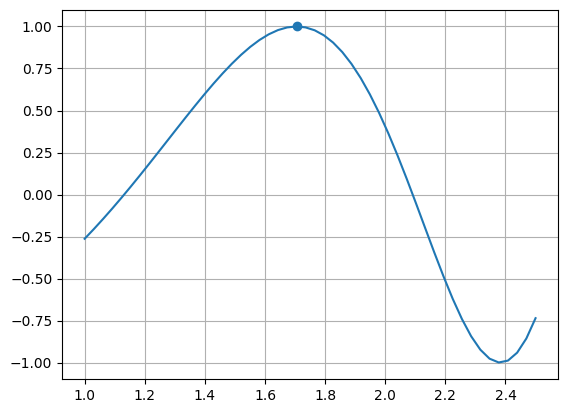

In [140]:
plt.plot(x_vals, f(x_vals))
plt.scatter(x_apprs[-1], f(x_apprs[-1]))
plt.grid(True)

# Сравнение методов

$$
\begin{aligned}
& \text {Table 1.1. Сравнение методов}\\
&\begin{array}{ccc}
\hline \hline \text { Метод } & \text { Условие остановки } & \text { Число итераций }  \\
\hline дихотомии & |x_{k+1} - x_{k}| < \varepsilon & 9 \\
дихотомии & |a_{k} - b_{k}| < \varepsilon & 10 \\
Ньютона & |x_{k+1} - x_{k}| < \varepsilon & 5 \\
Ньютона & |f'(x_{k})| < \varepsilon & 4 \\

\hline
\end{array}
\end{aligned}
$$

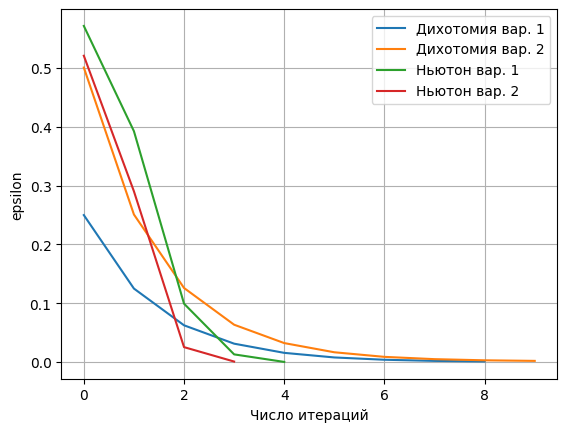

In [151]:
plt.plot(range(len(eps1)), eps1, label='Дихотомия вар. 1')
plt.plot(range(len(eps2)), eps2, label='Дихотомия вар. 2')
plt.plot(range(len(eps3)), eps3, label='Ньютон вар. 1')
plt.plot(range(len(eps4)), eps4, label='Ньютон вар. 2')
plt.xlabel('Число итераций')
plt.ylabel('epsilon')
plt.legend()
plt.grid(True)